**Emotion in politics: modeling with graph networks**


In [1]:
# Install egm package
import pandas as pd
import numpy as np

In [2]:
plot_sample_egm = pd.DataFrame(columns=['doc_id','title','publish_year','doi','abstract','region','x','y','xy_column','relevance', 'researchdesign'])
#plot_sample_egm = pd.DataFrame(columns=["Disgust","Anxiety","Anger","Fear","Pity","Sympathy","Compassion","Hatred","Envy","Happiness","Loss","Grief","Sorrow","Jealousy","Bereavement"])
plot_sample_egm = pd.read_csv('final_coded_emotion_agency.csv')
#plot_sample_egm
#plot_sample_egm = pd.read_csv('emotion_egm.csv')

Define two lists for the X and Y Bins

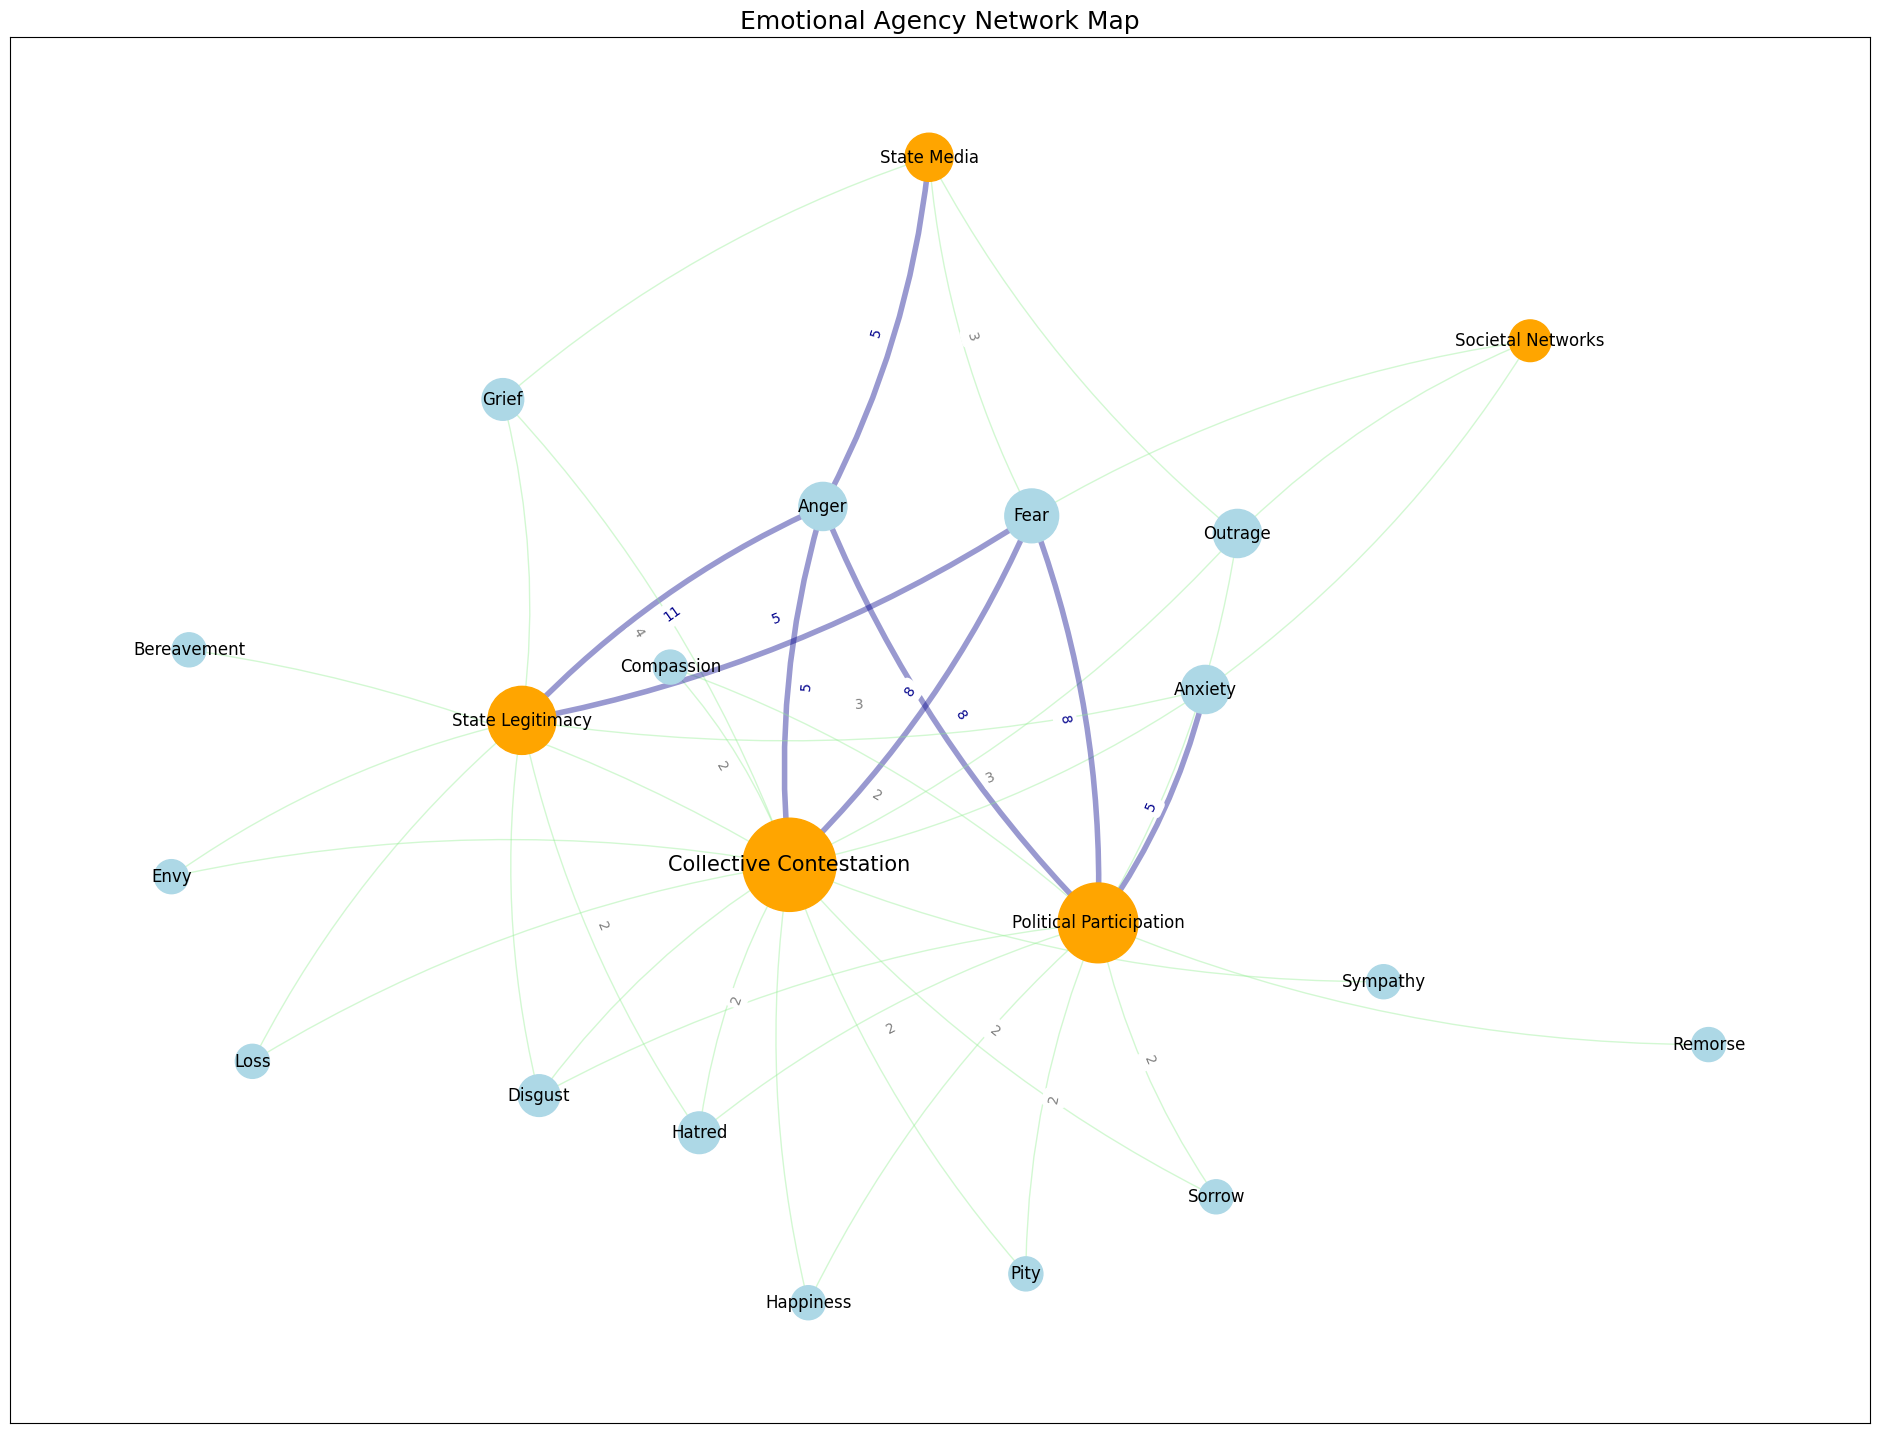

In [3]:
from __future__ import division
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import networkx as nx
from matplotlib.lines import Line2D

# if you're in a jupyter notebook
%matplotlib inline

#Useful linearspaces to give values to the parameters w and b

data = pd.DataFrame({'emotion':plot_sample_egm['emotion'], 
                     'theme':plot_sample_egm['theme'], 
                     'effect_size':plot_sample_egm['effect_size'], 
                     'paper':plot_sample_egm['paper'], 
                     'size':plot_sample_egm['size'],})
#display(data)
e = plot_sample_egm['emotion']
t = plot_sample_egm['theme']
c = plot_sample_egm['size']
G1 = nx.from_pandas_edgelist(data, 'emotion', 'theme')
#nx.convert_node_labels_to_integers(G);
#j = 0
#for n in e:
#    G1.add_edge(e[j], t[j], weight=c[j])
#    j += 1
#for v in G1:
#    G1.nodes[v]["class"] = G1.degree(v)
#print(G1.nodes.data())

G2 = nx.from_pandas_edgelist(data, 'emotion', 'paper')
#nx.convert_node_labels_to_integers(G2);

for v in G2:
    G2.nodes[v]["class"] = G2.degree(v)
#print(G2.nodes.data())
weights = list(data['size'])
sz = plot_sample_egm['effect_size']
p = plot_sample_egm['paper']

######################################################################
G3 = nx.Graph()
j = 0
for n in e:
    G3.add_edge(e[j], t[j], weight=c[j])
    #display(e[j], t[j], c[j])  
    j += 1
weights = nx.get_edge_attributes(G3, 'weight')

#for w in widths:
#    display(w)  
def minimum(a, b):
    if a <= b:
        return b
    else:
        return a
def maximum(a, b):
    if a <= b:
        return a
    else:
        return b
######################################################################
G = G3
nodes = G.nodes()

color_map = []
for node in G:
    if len(node.split()) == 2:
        color_map.append('orange')
    else: 
        color_map.append('lightblue')  

ecolor_map = []
ewidth_map = []
for edge in G.edges(data='weight'):
    if edge[2] >= 5:
        ecolor_map.append('darkblue')
        ewidth_map.append(4)
    else: 
        ecolor_map.append('lightgreen')  
        ewidth_map.append(1)

fig, ax = plt.subplots(figsize=(24,18))
# Add title to the Heat map
title = "Emotional Agency Network Map"
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
#ttl.set_position([0.5,1.05])

#pos=nx.spiral_layout(G, resolution=.8, equidistant=False)
#pos = nx.circular_layout(G.subgraph(nodes))
#dist = dict()
pos = nx.kamada_kawai_layout(G1)#, weight='weight')
#pos = nx.random_layout(G)

d = dict(G.degree)
nx.draw_networkx_nodes(G, node_color=color_map, 
        node_size=[minimum(d[k]*300, 600) for k in d],
        pos=pos)

#for edge in G.edges(data='weight'):
#    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=ecolor_map)
#for edge in G.edges(data='weight'):
nx.draw_networkx_edges(G, pos, alpha=0.4, 
                       edge_color=ecolor_map, 
                       width=ewidth_map, 
                       connectionstyle="arc3,rad=0.1", arrows=True)

# use a log-norm, do not see how to pass this through nx API
# just set it after-the-fact
from matplotlib.pyplot import text
for node, (x, y) in pos.items():
   text(x, y, node, fontsize= minimum( d[node], 12), ha='center', va='center')


nx.draw_networkx_edge_labels(G,pos, 
                            edge_labels ={(n1,n2):weights[n1,n2] for (n1,n2) in weights if weights[n1,n2] >=5}, font_color='darkblue')
nx.draw_networkx_edge_labels(G,pos, 
                            edge_labels ={(n1,n2):weights[n1,n2] for (n1,n2) in weights if weights[n1,n2] <5 and weights[n1,n2] >= 2}, font_color='gray', horizontalalignment='right')

#######################

###########################
plt.savefig('final_coded_network_graph_emotion_agency.png')
plt.show()
